In [1]:
import pandas as pd
import sqlite3

In [25]:
goCrm = sqlite3.connect('go_crm.sqlite')
goSales = sqlite3.connect('go_sales.sqlite')
salesDemographic_df = pd.read_sql_query("SELECT AGE_GROUP_CODE, RETAILER_CODEMR FROM sales_demographic", goCrm)
ageGroup_df = pd.read_sql_query("SELECT AGE_GROUP_CODE, UPPER_AGE, LOWER_AGE FROM age_group", goCrm)
retailer_df = pd.read_sql_query("SELECT RETAILER_CODEMR, RETAILER_CODE FROM retailer", goCrm)
retailer_site_df = pd.read_sql_query("SELECT RETAILER_SITE_CODE, RETAILER_CODE FROM retailer_site", goSales)
order_header_df = pd.read_sql_query("SELECT RETAILER_SITE_CODE, ORDER_NUMBER FROM order_header", goSales)
order_details_df = pd.read_sql_query("SELECT ORDER_NUMBER, QUANTITY, UNIT_SALE_PRICE FROM order_details", goSales)

merged_df = pd.merge(salesDemographic_df, ageGroup_df, on='AGE_GROUP_CODE')
merged_df = pd.merge(merged_df, retailer_df, on='RETAILER_CODEMR')
merged_df = pd.merge(merged_df, retailer_site_df, on='RETAILER_CODE')
merged_df = pd.merge(merged_df, order_header_df, on='RETAILER_SITE_CODE')
merged_df = pd.merge(merged_df, order_details_df, on='ORDER_NUMBER')

merged_df

,AGE_GROUP_CODE,RETAILER_CODEMR,UPPER_AGE,LOWER_AGE,RETAILER_CODE,RETAILER_SITE_CODE,ORDER_NUMBER,QUANTITY,UNIT_SALE_PRICE
0,1,1,20,0,89,1,1191,30,106
1,1,1,20,0,89,1,1191,16,116.73
2,1,1,20,0,89,1,1191,10,349.98
3,1,1,20,0,89,1,1191,26,148.3
4,1,1,20,0,89,1,1209,58,555.53
...,...,...,...,...,...,...,...,...,...
241993,6,73,70,61,103,82,6264,8,80
241994,6,73,70,61,103,83,5472,20,146.83
241995,6,73,70,61,103,83,5495,14,77.94
241996,6,73,70,61,103,83,5518,24,129


In [3]:
# Find the most frequent age group code
most_available_age_group_code = merged_df['AGE_GROUP_CODE'].value_counts()

# Print the most available age group code
print("The age group code that is most available in the table is:", most_available_age_group_code)

The age group code that is most available in the table is: AGE_GROUP_CODE
1    40333
4    40333
2    40333
3    40333
5    40333
6    40333
Name: count, dtype: int64


In [28]:
# Calculate revenue for each transaction
merged_df['REVENUE'] = merged_df['QUANTITY'].astype(float) * merged_df['UNIT_SALE_PRICE'].astype(float)

# Group by age group and sum the revenue
revenue_by_age_group = merged_df.groupby('AGE_GROUP_CODE')['REVENUE'].sum()

print("The age group that has generated the most revenue is:")
print(revenue_by_age_group)

The age group that has generated the most revenue is:
AGE_GROUP_CODE
1    157981998.7
2    157981998.7
3    157981998.7
4    157981998.7
5    157981998.7
6    157981998.7
Name: REVENUE, dtype: float64


In [59]:
import pyodbc
import pandas as pd

DB = {'servername': r'LAPTOP-NDOACQTH\SQLEXPRESS',
      'database': 'GreatOutdoorsEnquete'}

# Constructing the connection string with Windows Authentication
conn_str = (
    'Driver={SQL Server};'
    'SERVER=' + DB['servername'] + ';'
    'DATABASE=' + DB['database'] + ';'
    'Trusted_Connection=yes;'
)

# Establishing the connection
export_conn = pyodbc.connect(conn_str)
export_cursor = export_conn.cursor()

# Selecting all data from the dbo.Enquete table
export_cursor.execute("SELECT * FROM dbo.Enquete")

# Fetching all the rows
rows = export_cursor.fetchall()

# Closing the cursor and connection
export_cursor.close()
export_conn.close()

# Splitting the data into separate columns
data = [list(row) for row in rows]

# Creating DataFrame
df = pd.DataFrame(data, columns=["ID", "Leeftijd", "Sociale_Media_Advertentie", 
                                 "Influencers_Samenwerking", "Sociale_Media_Invloed", 
                                 "Koopfrequentie", "Populairste_Merken", 
                                 "Marketing_Strategien"])
df

,ID,Leeftijd,Sociale_Media_Advertentie,Influencers_Samenwerking,Sociale_Media_Invloed,Koopfrequentie,Populairste_Merken,Marketing_Strategien
0,640,18,Ongeveer 1 keer per week,Erg belangrijk,Erg veel,Ongeveer 1 keer per week,North face,Authenticiteit
1,641,18,Ongeveer 1 keer per maand,Erg belangrijk,Erg veel,Ongeveer 1 keer per maand,North face,Social media
2,642,18,Ongeveer 1 keer per maand,Erg belangrijk,Erg veel,Ongeveer 1 keer per maand,North face,Social media
3,643,18,Ongeveer 1 keer per maand,Erg belangrijk,Veel,Ongeveer 1 keer per maand,North face,Social media
4,644,18,Ongeveer 1 keer per jaar,Erg belangrijk,Veel,Ongeveer 1 keer per maand,North face,Social media
5,645,18,Ongeveer 1 keer per jaar,Belangrijk,Veel,Ongeveer 1 keer per maand,North face,Social media
6,646,18,Ongeveer 1 keer per jaar,Belangrijk,Veel,Ongeveer 1 keer per maand,North face,Social media
7,647,18,Ongeveer 1 keer per jaar,Belangrijk,Veel,Ongeveer 1 keer per maand,North face,Social media
8,648,18,Ongeveer 1 keer per jaar,Belangrijk,Veel,Ongeveer 1 keer per maand,North face,Social media
9,649,19,Nee,Belangrijk,Veel,Ongeveer 1 keer per maand,North face,Social media


IndexError: index 2 is out of bounds for axis 0 with size 2

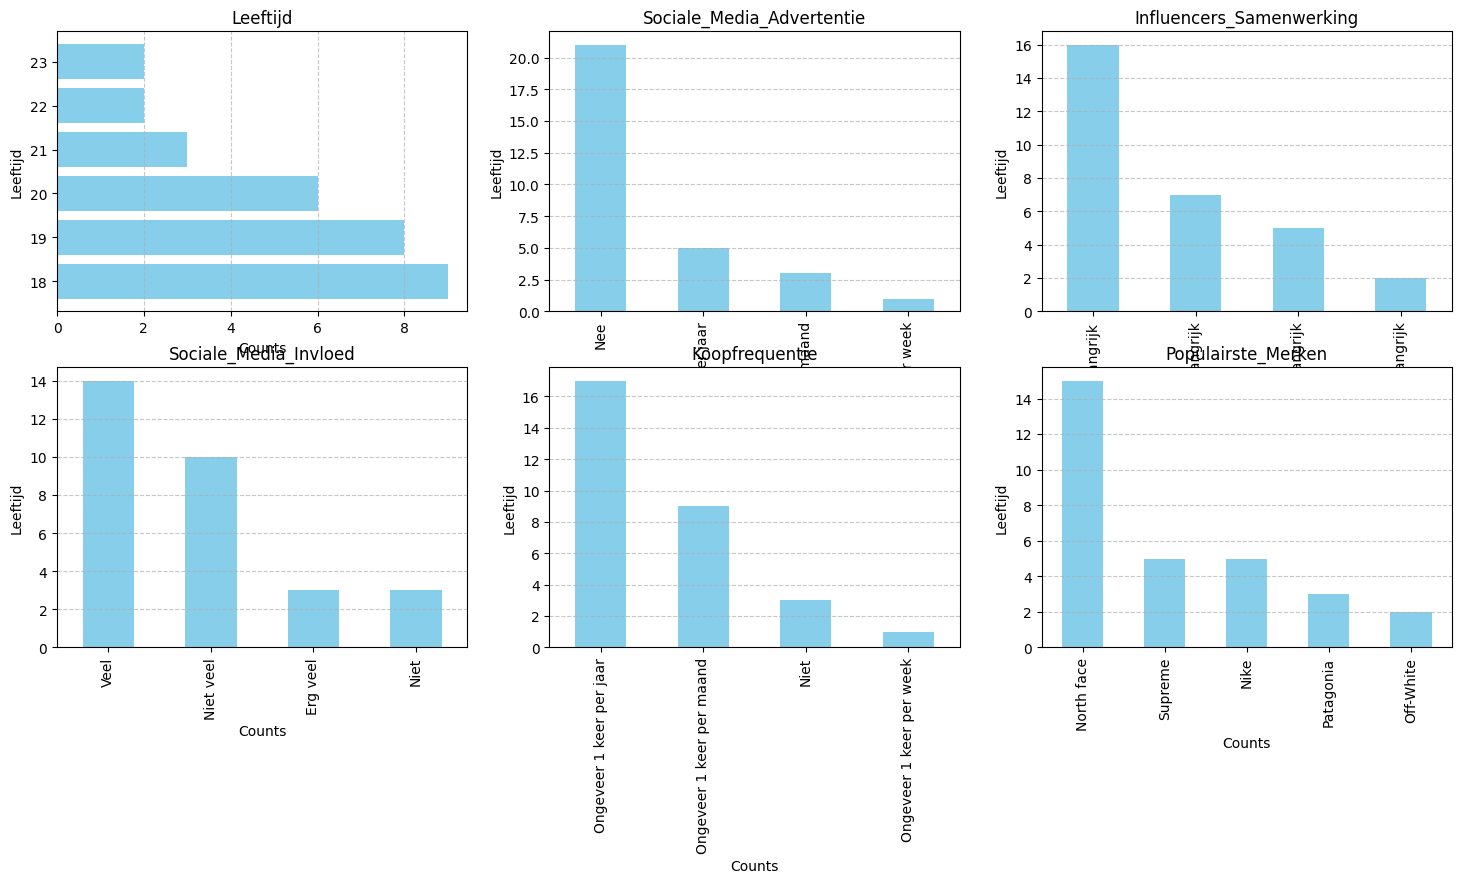

In [60]:
import matplotlib.pyplot as plt

# Drop the 'ID' column
df = df.drop(columns=['ID'])

# Calculate the number of columns to plot (excluding 'Leeftijd')
num_cols = len(df.columns) - 1  # Subtract 1 for 'Leeftijd'

# Calculate the number of rows and columns for the subplot grid
num_rows = (num_cols + 2) // 3  # Add 2 to account for the first row with 'Leeftijd'
num_cols = min(num_cols, 3)

# Set up subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, num_rows * 4))

# Plot 'Leeftijd' separately
axs[0, 0].barh(df['Leeftijd'].value_counts().index, df['Leeftijd'].value_counts(), color='skyblue')
axs[0, 0].set_title('Leeftijd')
axs[0, 0].set_xlabel('Counts')
axs[0, 0].set_ylabel('Leeftijd')
axs[0, 0].grid(axis='x', linestyle='--', alpha=0.7)

# Plot each column (excluding 'Leeftijd')
plot_col_index = 1
for i, col in enumerate(df.columns):
    if col != 'Leeftijd':
        ax = axs[plot_col_index // 3, plot_col_index % 3]
        df[col].value_counts().plot(kind='bar', ax=ax, color='skyblue')
        ax.set_title(col)
        ax.set_xlabel('Counts')
        ax.set_ylabel('Leeftijd')
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        plot_col_index += 1

# Adjust layout to add space around plots
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)

plt.show()
